In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
from pandas.testing import assert_frame_equal
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
p1 = Path.cwd() / 'back_data'

In [2]:
import datetime
import time
from datetime import datetime, date, timedelta

In [3]:
# 날짜와 시간 기능의 경우 파이썬은 datetime 모듈 활용
# 반면 pandas에는 Timestamp라는 단일 객체 존재 -> numpy의 datetime64 데이터 형식에서 파생

In [4]:
# pandas 날짜 및 시간의 경우 주로 to_datetime() 함수 활용
pd.to_datetime('2022-08-05')
# 해당 Timestamp 객체를 파이썬의 datetime 형식으로 바꾸고 싶은 경우 to_pydatetime() 메서드 활용
pd.to_datetime('2022-08-05').to_pydatetime()

datetime.datetime(2022, 8, 5, 0, 0)

In [5]:
# to_datetime() 함수의 경우 dayfirst, unit, origin 파라미터 등 활용하여 여러 형식 가능
pd.to_datetime('2022-08-05'), pd.to_datetime('2022-05-08', dayfirst=True), pd.to_datetime(1000, unit='D', origin='2020-01-01')

(Timestamp('2022-08-05 00:00:00'),
 Timestamp('2022-05-08 00:00:00'),
 Timestamp('2022-09-27 00:00:00'))

In [6]:
# Series를 전달하여 Timestamp 객체를 가진 Series로 반환 가능
series1 = pd.Series([10, 100, 1000, 10000])
# pandas가 리스트 내 자료들을 자동으로 날짜로 상황에 맞게 변환해주나, 이러한 방식은 가급적 기피해야 -> 같은 날짜 형식으로 배치 필요
series2 = pd.Series(['12-5-2015', '14-1-2013', '20/12/2017', '40/23/2017'])
pd.to_datetime(series1, unit='D'), pd.to_datetime(series2, errors='coerce')
# pd.date_range() 함수도 고려 필요 -> start, end, periods, freq(구분: 'H', 'D' 등) 파라미터 활용 가능

C:\Users\admin\AppData\Local\Temp\ipykernel_12920\3984827390.py:5: UserWarning: Parsing '20/12/2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  pd.to_datetime(series1, unit='D'), pd.to_datetime(series2, errors='coerce')


(0   1970-01-11
 1   1970-04-11
 2   1972-09-27
 3   1997-05-19
 dtype: datetime64[ns],
 0   2015-12-05
 1   2013-01-14
 2   2017-12-20
 3          NaT
 dtype: datetime64[ns])

In [7]:
# pandas의 to_timedelta() 함수를 이용하여 시간량 처리(offset) 가능 -> pandas의 Timedelta 객체 활용
pd.to_timedelta('67:15:45.454')

Timedelta('2 days 19:15:45.454000')

In [8]:
# offset의 경우 DateOffset() 함수도 이용 가능 -> years, months, days, hours, minutes, seconds 파라미터 활용
date_offset = pd.DateOffset(years=3, months=2, days=15)
pd.to_datetime('2020-01-01') + date_offset

Timestamp('2023-03-16 00:00:00')

In [9]:
# Timedelta 객체의 경우 각각을 더하거나 나누는 것도 가능
pd.to_timedelta('12 days') / pd.to_timedelta('3 days')

4.0

In [10]:
# Timestamp 및 Timedelta 객체는 속성과 메서드에 많은 특징 보유
timestamp = pd.to_datetime('2022-08-05 23:10:11')
# ceil(), round(), floor() 메서드 활용하여 올림 등 가능
# year, month, day, hour, minute, second 속성 활용하여 추출 가능
# dayofweek, dayofyear, dayofweek, daysinmonth 속성 활용하여 추출 가능
timestamp.ceil('12h'), timestamp.year, timestamp.day, timestamp.dayofweek

(Timestamp('2022-08-06 00:00:00'), 2022, 5, 4)

In [11]:
# Timestamp 및 Timedelta 객체는 속성과 메서드에 많은 특징 보유
timedelta = pd.to_timedelta('5 days 05:52:20')
# ceil(), round(), floor() 메서드 활용하여 올림 등 가능
# components 속성 활용하여 내용 파악 가능
# total_seconds() 메서드 이용하여 총 초수 확인 가능
timedelta.round('min'), timedelta.components, timedelta.total_seconds()

(Timedelta('5 days 05:52:00'),
 Components(days=5, hours=5, minutes=52, seconds=20, milliseconds=0, microseconds=0, nanoseconds=0),
 453140.0)

In [12]:
# hdf5 파일 형식은 대규모 데이터를 효율적으로 저장할 수 있는 파일 형식
crime = pd.read_hdf(p1 / 'crime.h5', 'crime')
crime.dtypes

OFFENSE_TYPE_ID              category
OFFENSE_CATEGORY_ID          category
REPORTED_DATE          datetime64[ns]
GEO_LON                       float64
GEO_LAT                       float64
NEIGHBORHOOD_ID              category
IS_CRIME                        int64
IS_TRAFFIC                      int64
dtype: object

In [13]:
# 인덱스 필터링을 위해 DatetimeIndex 설정 -> hdf 파일의 경우 read_hdf() 함수에서 index_col 파라미터는 활용 불가능
crime = crime.set_index('REPORTED_DATE')
crime.head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2014-06-29 02:01:00,traffic-accident-dui-duid,traffic-accident,-105.000149,39.745753,cbd,0,1
2014-06-29 01:54:00,vehicular-eluding-no-chase,all-other-crimes,-104.884660,39.738702,east-colfax,1,0
2014-06-29 02:00:00,disturbing-the-peace,public-disorder,-105.020719,39.706674,athmar-park,1,0
2014-06-29 02:18:00,curfew,public-disorder,-105.001552,39.769505,sunnyside,1,0
2014-06-29 04:17:00,aggravated-assault,aggravated-assault,-105.018557,39.679229,college-view-south-platte,1,0


In [14]:
# Timestamp를 인덱스로 설정하면 "부분 매칭"되는 모든 행 선택 가능, 슬라이싱도 가능
# but 슬라이싱의 경우 DatetimeIndex가 정렬이 안되어있으면 deprecate 될 예정 -> 정렬을 시켜놔야
crime = crime.sort_index()
# 슬라이싱의 경우 양쪽 닫힘 형태 -> '2016-01-01'에 해당하는 모든 값들 포함
crime.loc['2016-05-12'].head(), crime.loc['2015-03-04':'2016-01-01'].tail()

(                               OFFENSE_TYPE_ID OFFENSE_CATEGORY_ID  \
 REPORTED_DATE                                                        
 2016-05-12 00:05:00  public-order-crimes-other    all-other-crimes   
 2016-05-12 00:07:00                     curfew     public-disorder   
 2016-05-12 00:13:00                 traf-other    all-other-crimes   
 2016-05-12 00:33:00   police-false-information    all-other-crimes   
 2016-05-12 01:01:00     traf-habitual-offender    all-other-crimes   
 
                         GEO_LON    GEO_LAT NEIGHBORHOOD_ID  IS_CRIME  \
 REPORTED_DATE                                                          
 2016-05-12 00:05:00 -104.987417  39.727275    civic-center         1   
 2016-05-12 00:07:00 -104.987432  39.726668    lincoln-park         1   
 2016-05-12 00:13:00 -105.053191  39.719419     barnum-west         1   
 2016-05-12 00:33:00 -104.965948  39.764498            cole         1   
 2016-05-12 01:01:00 -104.902327  39.771602       stapleton    

In [15]:
# 시간 데이터로 열 필터링도 가능
crime = pd.read_hdf(p1 / 'crime.h5', 'crime')

In [16]:
# 열 필터링을 위해 불리언 배열 사용 -> 다만 불리언 배열만으로는 날짜가 일부 매치하는 행 선택 불가능
crime[crime['REPORTED_DATE'] == '2016-05-12 16:45:00']

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
300905,traffic-accident,traffic-accident,2016-05-12 16:45:00,-104.847024,39.779596,montbello,0,1
302354,traffic-accident,traffic-accident,2016-05-12 16:45:00,-105.049180,39.769296,west-highland,0,1
302373,fraud-identity-theft,white-collar-crime,2016-05-12 16:45:00,-104.931971,39.717359,hilltop,1,0


In [17]:
# 일부 매칭을 위해 부분 날짜 문자열을 지원하는 between() 메서드 활용 가능
# 단 열 필터링의 between() 메서드의 경우 양쪽 닫힘은 맞으나 '2016-05-13 00:00:00'에서 닫힘 되는 형태
# 즉 '2016-05-13'는 '2016-05-13 00:00:00'의 축약 형태
#  -> DatetimeIndex 필터링 복제를 위해서는 between() 메서드 활용 시 '2016-05-13 23:59:59'로 설정해야
crime[crime['REPORTED_DATE'].between('2016-05-12', '2016-05-13')]

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,REPORTED_DATE,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
295715,criminal-mischief-other,public-disorder,2016-05-12 23:51:00,-105.017241,39.705845,athmar-park,1,0
296474,liquor-possession,drug-alcohol,2016-05-12 18:40:00,-104.995692,39.747875,cbd,1,0
297204,traffic-accident,traffic-accident,2016-05-12 22:26:00,-104.880037,39.777037,stapleton,0,1
299383,theft-bicycle,larceny,2016-05-12 20:35:00,-104.929350,39.763797,northeast-park-hill,1,0
299389,theft-of-motor-vehicle,auto-theft,2016-05-12 09:39:00,-104.941233,39.775510,elyria-swansea,1,0
...,...,...,...,...,...,...,...,...
358208,public-peace-other,public-disorder,2016-05-12 17:55:00,-105.027747,39.700029,westwood,1,0
358448,threats-to-injure,public-disorder,2016-05-12 19:24:00,-104.947118,39.763777,clayton,1,0
363134,sex-aslt-rape,sexual-assault,2016-05-12 22:28:00,NaN,NaN,harvey-park-south,1,0
365959,menacing-felony-w-weap,aggravated-assault,2016-05-12 15:59:00,-104.935172,39.723703,hilltop,1,0


In [18]:
# 속도의 경우 DatetimeIndex로 필터링을 하는 것이 훨씬 더 효율적

In [19]:
# DatetimeIndex에서만 작동되는 메서드 확인
crime = pd.read_hdf(p1 / 'crime.h5', 'crime').set_index('REPORTED_DATE').sort_index()

In [20]:
# between_time() 메서드 활용해 날짜와 관계 없이 시간 구간으로 확인
# 기존에는 include_end 파라미터 활용했으나, deprecate 예정이므로 inclusive 파라미터로 수정
crime.between_time('2:00', '2:10', inclusive='both')

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-04 02:08:00,vehicular-eluding,all-other-crimes,-104.987485,39.739897,civic-center,1,0
2012-01-04 02:08:00,traffic-accident-dui-duid,traffic-accident,-104.987485,39.739897,civic-center,0,1
2012-01-04 02:09:00,theft-items-from-vehicle,theft-from-motor-vehicle,-104.957280,39.698563,belcaro,1,0
2012-01-04 02:10:00,vehicular-eluding-no-chase,all-other-crimes,-105.028386,39.753627,sloan-lake,1,0
2012-01-07 02:00:00,traffic-accident,traffic-accident,-104.958599,39.736812,congress-park,0,1
...,...,...,...,...,...,...,...
2017-09-27 02:05:00,criminal-mischief-other,public-disorder,-104.891374,39.637873,hampden-south,1,0
2017-09-28 02:03:00,traffic-accident-dui-duid,traffic-accident,-105.038713,39.706760,westwood,0,1
2017-09-28 02:06:00,traffic-accident-dui-duid,traffic-accident,-105.034074,39.697213,westwood,0,1


In [21]:
# at_time() 메서드 활용해 해당 시간에 발생한 범죄 확인
crime.at_time('05:47').head()

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-15 05:47:00,burglary-business-by-force,burglary,-104.967844,39.678296,university,1,0
2012-05-26 05:47:00,assault-simple,other-crimes-against-persons,-104.991880,39.753646,five-points,1,0
2012-06-10 05:47:00,aggravated-assault,aggravated-assault,-105.020598,39.676478,college-view-south-platte,1,0
2012-07-04 05:47:00,sex-aslt-rape,sexual-assault,NaN,NaN,west-highland,1,0
2012-07-09 05:47:00,theft-of-motor-vehicle,auto-theft,-105.030215,39.708802,westwood,1,0


In [22]:
# first() 메서드 활용해 시간에 대해 첫 n 세그먼트 선택 가능 -> pd.offsets 모듈에 있는 DateOffset 객체로 표시
# 첫 날짜 및 시간으로부터 6개월 안에 있는 데이터 표시('2012-01-02 00:06:00' ~ '2012-07-01 00:06:00')
# MonthBegin()에 normalize=True 인자 전달할 수 있으나, 이것도 엄밀히는 부정확('2012-07-01 00:00:00' 데이터가 포함)
# -> loc속성을 활용한 슬라이싱을 진행하는 것이 6월까지 데이터를 얻기에는 가장 정확
crime.first(pd.offsets.MonthBegin(6))

,OFFENSE_TYPE_ID,OFFENSE_CATEGORY_ID,GEO_LON,GEO_LAT,NEIGHBORHOOD_ID,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,,,,,,
2012-01-02 00:06:00,aggravated-assault,aggravated-assault,-104.816860,39.796717,montbello,1,0
2012-01-02 00:06:00,violation-of-restraining-order,all-other-crimes,-104.816860,39.796717,montbello,1,0
2012-01-02 00:16:00,traffic-accident-dui-duid,traffic-accident,-104.971851,39.736874,cheesman-park,0,1
2012-01-02 00:47:00,traffic-accident,traffic-accident,-104.951824,39.740168,congress-park,0,1
2012-01-02 01:35:00,aggravated-assault,aggravated-assault,-104.998131,39.749922,union-station,1,0
...,...,...,...,...,...,...,...
2012-06-30 23:40:00,traffic-accident-dui-duid,traffic-accident,-104.922266,39.678471,goldsmith,0,1
2012-06-30 23:44:00,traffic-accident,traffic-accident,-104.987578,39.711158,baker,0,1
2012-06-30 23:50:00,criminal-mischief-mtr-veh,public-disorder,-104.838271,39.788683,montbello,1,0


In [23]:
# pd.offset.MonthBegin() 대신 오프셋 별칭(offset alias) 활용 가능
# 'D', 'B'(영업일), 'W', 'MS', 'QS', 'A' 등 전달
crime.first('6MS').equals(crime.first(pd.offsets.MonthBegin(6)))

True

In [24]:
# first() 메서드에 pd.offsets를 전달하는 경우 첫 번째 인덱스에 pd.offsets를 더하는 형태와 동일
# 원하는 offset이 없을 때는 pd.DateOffset() 함수로 사용자 정의 DateOffset 구축
crime.first(pd.offsets.MonthBegin(6)).index[-1], crime.index[0] + pd.offsets.MonthBegin(6)

(Timestamp('2012-07-01 00:01:00'), Timestamp('2012-07-01 00:06:00'))

In [25]:
# resample() 메서드를 통해 가능한 시간 범위별로 그룹화 가능 -> DatetimeIndex 특유의 groupby() 메서드 느낌
(crime
# 'D', 'M', 'Y' 등 전달 가능
# 기본 설정 파악 필요 : 'W' 인자 전달 시 한 주의 마지막 날은 일요일로 선택 -> 'W-THU' 형식으로 전달하여 변경 가능
.resample('W')
.size()
.head()
)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [26]:
# pd.Grouper(freq='') 전달하여 groupby() 메서드로 재현 가능
(crime
.groupby(pd.Grouper(freq='W'))
.size()
.head()
)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

In [27]:
# Timestamp가 인덱스에 포함되어있지 않더라도 해당 열을 지정함으로써 resample() 메서드 활용 가능
crime2 = pd.read_hdf(p1 / 'crime.h5', 'crime')
(crime2
# on 파라미터를 활용해 datetime 성질을 가진 열 전달
.resample('W', on='REPORTED_DATE')
.size()
.head()
)

REPORTED_DATE
2012-01-08     877
2012-01-15    1071
2012-01-22     991
2012-01-29     988
2012-02-05     888
Freq: W-SUN, dtype: int64

<AxesSubplot:xlabel='REPORTED_DATE'>

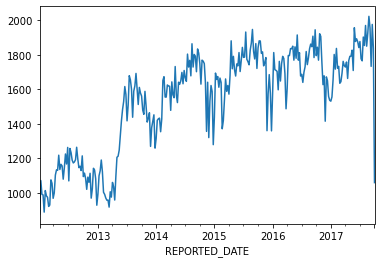

In [28]:
# Timestamp가 인덱스에 포함되어있지 않더라도 해당 열을 지정함으로써 groupby() 메서드로 복제 가능
(crime2
# pd.Grouper() 함수에 key 파라미터를 활용해 datetime 성질을 가진 열 전달
.groupby(pd.Grouper(freq='W', key='REPORTED_DATE'))
.size()
# plot() 메서드를 호출하여 도식화 가능
.plot()
)

In [30]:
# 분기별 범죄 및 교통사고 수 파악
(crime
.resample('Q')[['IS_CRIME', 'IS_TRAFFIC']]
.sum()
.head()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-03-31,7882,4726
2012-06-30,9641,5255
2012-09-30,10566,5003
2012-12-31,9197,4802
2013-03-31,8730,4442


In [31]:
(crime
# resample() 메서드에 전달할 인자를 'QS'로 바꾸면 이름만 분기 시작으로 바뀜
# 분기가 3월 1일에 시작하게 하려면 'QS-MAR'를 사용해 오프셋 별칭 고정
.resample('QS')[['IS_CRIME', 'IS_TRAFFIC']]
.sum()
.head()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
2012-01-01,7882,4726
2012-04-01,9641,5255
2012-07-01,10566,5003
2012-10-01,9197,4802
2013-01-01,8730,4442


<AxesSubplot:title={'center':'Denver Crimes and Traffic Acctidents'}, xlabel='REPORTED_DATE'>

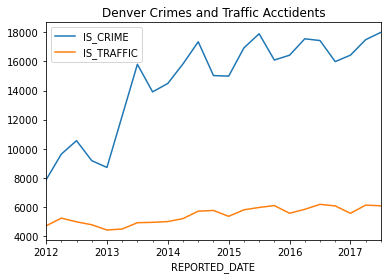

In [34]:
(crime
# groupby()를 활용하여 복제
.groupby(pd.Grouper(freq='QS'))[['IS_CRIME', 'IS_TRAFFIC']]
.sum()
# plot() 메서드 전달하여 시각화
.plot(title='Denver Crimes and Traffic Acctidents')
)

In [43]:
# 전년 동기 대비 증감율 확인 가능 -> shift() 메서드 활용
(crime
.groupby(pd.Grouper(freq='QS'))[['IS_CRIME', 'IS_TRAFFIC']]
.sum()
# shift(4) 메서드 전달하여 전년 동기랑 비교자료 형성 후 div()메서드로 나누기 진행 -> 백분율로 변환
.assign(CRIME_INC=lambda df: df['IS_CRIME'].div(df['IS_CRIME'].shift(4)).sub(1).mul(100).round(2).fillna('-'))
.assign(TRAFFIC_INC=lambda df: df['IS_TRAFFIC'].div(df['IS_TRAFFIC'].shift(4)).sub(1).mul(100).round(2).fillna('-'))
.head(10)
)

,IS_CRIME,IS_TRAFFIC,CRIME_INC,TRAFFIC_INC
REPORTED_DATE,,,,
2012-01-01,7882,4726,-,-
2012-04-01,9641,5255,-,-
2012-07-01,10566,5003,-,-
2012-10-01,9197,4802,-,-
2013-01-01,8730,4442,10.76,-6.01
2013-04-01,12259,4510,27.15,-14.18
2013-07-01,15799,4942,49.53,-1.22
2013-10-01,13910,4968,51.24,3.46
2014-01-01,14487,5021,65.95,13.03


In [44]:
# Timestamp 객체를 가진 열에는 dt 속성 존재 -> 여러가지 정보 습득 가능

<AxesSubplot:>

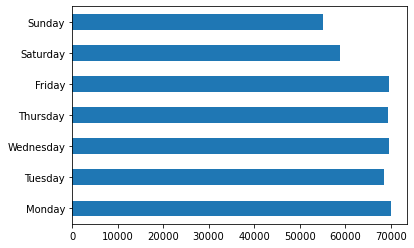

In [47]:
dayname = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
(crime2['REPORTED_DATE']
# dt 속성의 day_name() 메서드 소환 -> 해당 열의 요일 이름으로 반환
.dt.day_name()
.value_counts()
# reindex() 메서드를 활용한 재정렬
.reindex(dayname)
.plot.barh()
)

<AxesSubplot:>

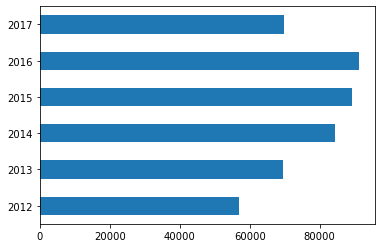

In [52]:
(crime2['REPORTED_DATE']
# dt 속성의 year 속성 소환 -> 해당 열의 요일 이름으로 반환
# day_name()은 해당 열을 가지고 뭔가 더 조치를 취해야해서 메서드 형식, year는 바로 추출할 수 있어서 속성 형식인듯?
.dt.year
.value_counts()
# sort_index() 메서드 활용하여 정렬
.sort_index()
.plot.barh()
)

In [61]:
# 연도별, 주별 모두 그룹화 -> groupby() 메서드 활용 가능
(crime2
# rename() 메서드를 활용해 출력될 이름 변경 가능
.groupby([crime2['REPORTED_DATE'].dt.year.rename('year'), crime2['REPORTED_DATE'].dt.day_name().rename('days')])
.size()
.unstack()
# 상술 내용은 pd.crosstab() 함수 활용하여 복제 가능 -> 'year' 열과 'days' 열을 생성한 뒤 pipe() 메서드로 pd.crosstab()을 전달
.reindex(dayname, axis=1)
)

days,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,10638,10628,10576,10545,10677,8514,8124


In [70]:
# 단 2017년의 숫자는 불완전 -> 선형 외삽(extrapoltation) 진행해야
criteria = crime2['REPORTED_DATE'].dt.year.eq(2017)
# dt 속성의 dayofyear 속성 활용해여 최대값 확인 -> 2017년은 272일까지만 데이터 존재
crime2.loc[criteria, 'REPORTED_DATE'].dt.dayofyear.max()

272

In [79]:
crime_pct = (crime2['REPORTED_DATE']
# 272일 이하를 불리언 배열로 추출
.dt.dayofyear.le(272)
# 'REPORTED_DATE' 열에 존재하는 각 연도별로 groupby() 진행
.groupby(crime2['REPORTED_DATE'].dt.year)
# mean() 메서드를 통해 처음 272일 동안 발생한 범죄의 평균 비율 파악
.mean()
.mul(100)
.round(2)
)
# crime_pct Series 확인 및 2016년까지의 중앙값 확인
crime_pct, crime_pct.loc[2012:2016].median()

(REPORTED_DATE
 2012     74.84
 2013     72.54
 2014     75.06
 2015     74.81
 2016     75.15
 2017    100.00
 Name: REPORTED_DATE, dtype: float64,
 74.84)

In [83]:
# 해당 중앙값을 바탕으로 2017년 데이터 업데이트 필요 -> 새로운 함수 생성하고 pipe() 메서드로 전달
def update2017(df):
    df.loc[2017] = df.loc[2017].div(0.748).astype('int')
    return df
table = (crime2
.groupby([crime2['REPORTED_DATE'].dt.year.rename('year'), crime2['REPORTED_DATE'].dt.day_name().rename('days')])
.size()
.unstack()
.reindex(dayname, axis=1)
.pipe(update2017)
)
table

days,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
year,,,,,,,
2012,8786,8191,8440,8440,8549,7442,7189
2013,10627,10416,10354,10431,10380,8875,8444
2014,12813,12440,12948,12309,12683,10950,10278
2015,13452,13381,13320,13512,13273,11586,10624
2016,13708,13338,13900,14050,14059,11467,10554
2017,14221,14208,14139,14097,14274,11382,10860


<AxesSubplot:xlabel='days', ylabel='year'>

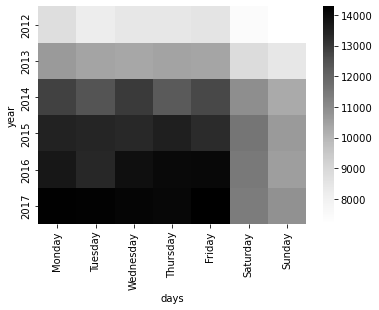

In [84]:
# Seaborn의 heatmap() 함수 사용하면서 cmap='Greys' 인자 전달(회색 음영으로 처리)
sns.heatmap(table, cmap='Greys')

In [85]:
# 덴버 시의 증가하는 인구 수도 감안해야
denver_pop = pd.read_csv(p1 / 'denver_pop.csv', index_col='Year')
denver_pop

,Population
Year,
2017,705000
2016,693000
2015,680000
2014,662000
2013,647000
2012,634000


In [88]:
# 인구 수를 고려하여 10만명당 범죄율 확인
# 기존 DataFrame에 나누기를 잘 적용시키기 위해 squeeze() 메서드 활용하여 Series로 변환
den_100k = denver_pop.div(100000).squeeze()
(table
# 기존 DataFrame을 den_100k Series로 나누기 진행 -> 연도별로 나눠야 하므로 axis=0 전달
.div(den_100k, axis=0)
.astype('int')
)

days,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,1385,1291,1331,1331,1348,1173,1133
2013,1642,1609,1600,1612,1604,1371,1305
2014,1935,1879,1955,1859,1915,1654,1552
2015,1978,1967,1958,1987,1951,1703,1562
2016,1978,1924,2005,2027,2028,1654,1522
2017,2017,2015,2005,1999,2024,1614,1540


In [101]:
crime_type = 'auto-theft'
(crime2
# query() 메서드를 통해 원하는 특정 형식의 범죄만 확인
.query("OFFENSE_CATEGORY_ID == @crime_type")
# assign()으로 year 열과 days 열을 추가한 후
.assign(year=lambda df: df['REPORTED_DATE'].dt.year)
.assign(days=lambda df: df['REPORTED_DATE'].dt.day_name())
# pipe() 메서드에 pd.crosstab() 함수 전달
.pipe(lambda df: pd.crosstab(df['year'], df['days']))
.reindex(dayname, axis=1)
.pipe(update2017)
.div(den_100k, axis=0)
.astype('int')
)

days,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
2012,95,72,72,76,71,78,76
2013,85,74,74,69,65,68,67
2014,94,76,72,70,76,67,67
2015,108,102,89,101,92,85,78
2016,119,102,100,99,97,86,85
2017,114,118,111,106,111,91,102


In [104]:
# 인덱스가 DatetimeIndex로 이루어져있는 경우 dt 속성 대신 index 속성 그대로 활용 가능
crime.index.day_name().value_counts().reindex(dayname)

Monday       70024
Tuesday      68394
Wednesday    69538
Thursday     69287
Friday       69621
Saturday     58834
Sunday       55213
Name: REPORTED_DATE, dtype: int64

In [107]:
# groupby() 메서드는 함수를 인수로 취할 수도 있음
(crime
# 실제로 index 속성의 day_name() 메서드 자체를 groupby에 넣거나 혹은
# ex(.groupby(crime.index.day_name())[['IS_CRIME', 'IS_TRAFFIC']])
# lambda 함수를 사용하여 index를 추출하여 index.day_name() 전달 가능
.groupby(lambda index: index.day_name())[['IS_CRIME', 'IS_TRAFFIC']]
.sum()
.reindex(dayname)
.head()
)

,IS_CRIME,IS_TRAFFIC
REPORTED_DATE,,
Monday,52158,17895
Tuesday,49658,18755
Wednesday,50054,19508
Thursday,49470,19845
Friday,48833,20814


In [115]:
# lambda 함수들을 리스트에 넣어 groupby() 메서드에 전달 가능
funcs = [lambda index: index.floor('12h').hour.rename('AM/PM'), lambda index: index.year.rename('YEAR')]
(crime
.groupby(funcs)[['IS_CRIME', 'IS_TRAFFIC']]
.sum()
.unstack(0)
.pipe(update2017)
# style 속성을 활용하여 가장 큰 값을 강조 가능
.style.highlight_max(color='blue')
)

In [116]:
# resample() 메서드는 시간 구간 이외 다른 그룹을 기준으로는 그룹화 불가능 -> groupby() 메서드를 활용해야
employee = pd.read_csv(p1 / 'employee.csv', parse_dates=['JOB_DATE', 'HIRE_DATE'], index_col='HIRE_DATE')

In [121]:
(employee
# groupby() 메서드에 pd.Grouper() 함수 및 희망하는 열을 전달
# freq='' 인자를 전달할 때 'W', 'M', 'Y' 뿐만 아니라 'AS' 형식도 전달 가능
.groupby([pd.Grouper(freq='10AS'), 'GENDER'])['BASE_SALARY']
.mean()
.round(-2)
.unstack()
)

GENDER,Female,Male
HIRE_DATE,,
1958-01-01,NaN,81200.0
1968-01-01,NaN,106500.0
1978-01-01,57100.0,72300.0
1988-01-01,57100.0,64600.0
1998-01-01,54700.0,59700.0
2008-01-01,47300.0,47200.0


In [129]:
# pd.cut() 함수를 사용해 연속변수를 이산변수로 바꾼 후 진행 가능
# bins 파라미터에 들어갈 자료를 숫자 형태의 리스트로 정리
bins = [-np.inf, 1959, 1969, 1979, 1989, 1999, 2009, np.inf]
# 각 bins 파라미터에 맞는 labels 파라미터를 리스트로 정리
labels = ['Before1960', '1960-1969', '1970-1979', '1980-1989', '1990-1999', '2000-2009', 'After2010']
# pd.cut() 함수를 활용 -> df.index.year를 전달, bins 및 labels 파라미터 활용
cuts = pd.cut(employee.index.year, bins=bins, labels=labels)
(employee
# groupby() 메서드에 cuts(pd.cut() 활용한 객체) 및 'GENDER' 열을 리스트로 묶어서 전달
.groupby([cuts, 'GENDER'])['BASE_SALARY']
.mean()
.round(-2)
.unstack()
)

GENDER,Female,Male
Before1960,NaN,81200.0
1960-1969,NaN,89600.0
1970-1979,37500.0,78300.0
1980-1989,56500.0,71000.0
1990-1999,57600.0,64300.0
2000-2009,53000.0,57800.0
After2010,46300.0,45600.0
